In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)

In [89]:
dfb = pd.read_csv('day.csv')
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
df = dfb

In [4]:
df_obj = dfb

In [5]:
dfb['dteday'] = pd.to_datetime(dfb['dteday'])
dfb['yr'] = pd.to_datetime(dfb['yr'])
dfb['mnth'] = pd.to_datetime(dfb['mnth'])

In [6]:
df_obj = df_obj[['season', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('object', inplace = True)

In [7]:
df_obj.dtypes

season        object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

In [90]:
df_num = dfb.drop(['instant','season', 'holiday', 'weekday', 'workingday', 'dteday', 'yr', 'mnth'], axis = 1)

In [91]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registered,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000
cnt,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


In [10]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null datetime64[ns]
mnth          731 non-null datetime64[ns]
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](3), float64(4), int64(9)
memory usage: 91.5 KB


In [11]:
dfb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
dfb.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr            datetime64[ns]
mnth          datetime64[ns]
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

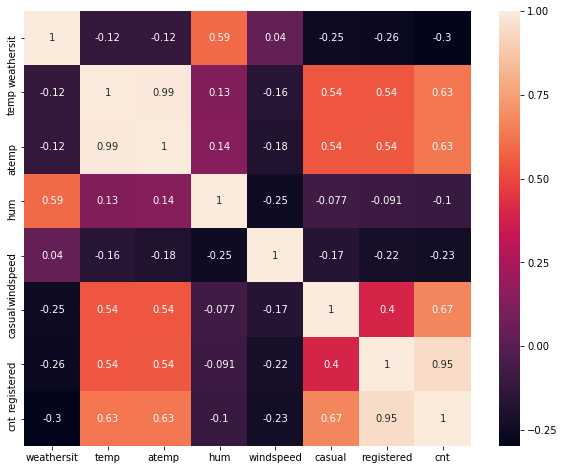

In [92]:
plt.subplots(figsize = (10,8))
sns.heatmap(df_num.corr(), annot = True)
plt.show()

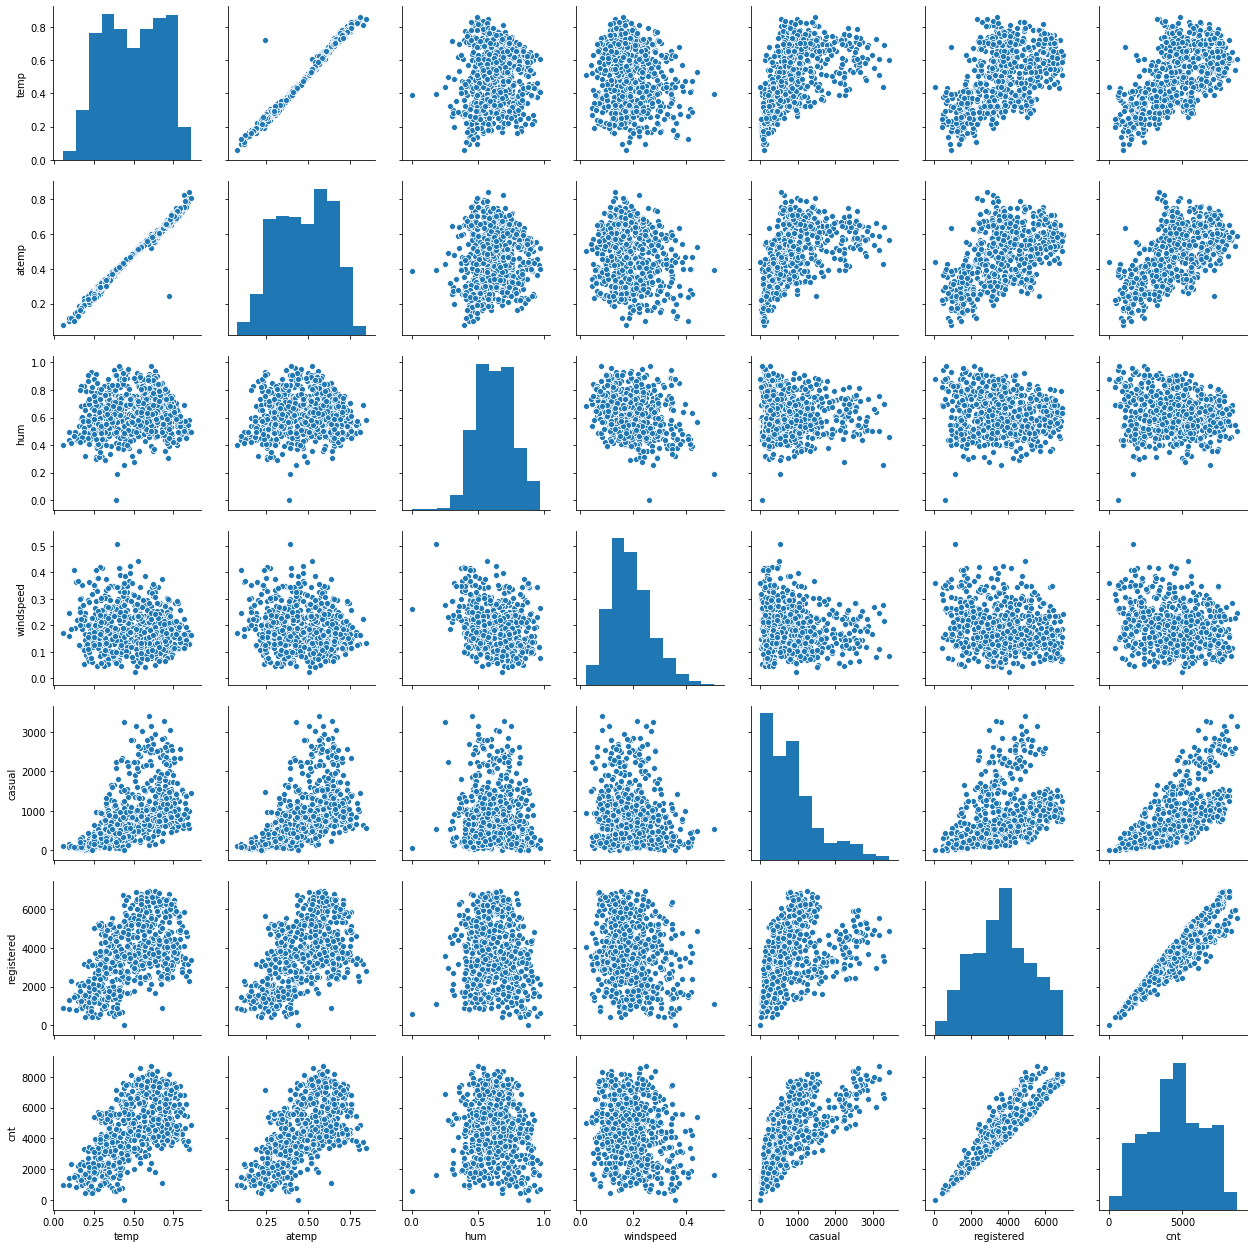

In [14]:
sns.pairplot(df_num)
plt.show()

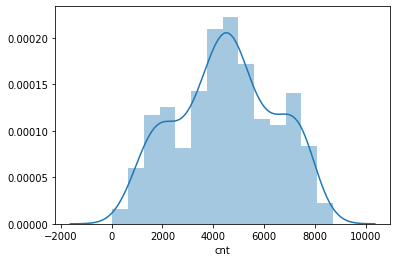

In [15]:
sns.distplot(df['cnt'])
plt.show()

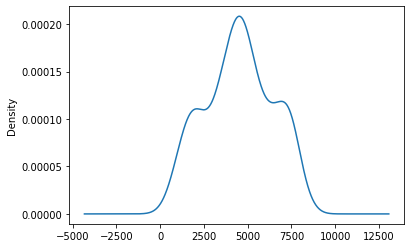

In [16]:
dfb['cnt'].plot(kind = 'density')

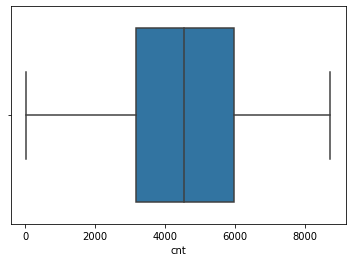

In [17]:
sns.boxplot(df['cnt'])

In [18]:
cols_num = list(df.select_dtypes(exclude= 'datetime64'))
cols_num

['instant',
 'season',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [19]:
df_num.dtypes

temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

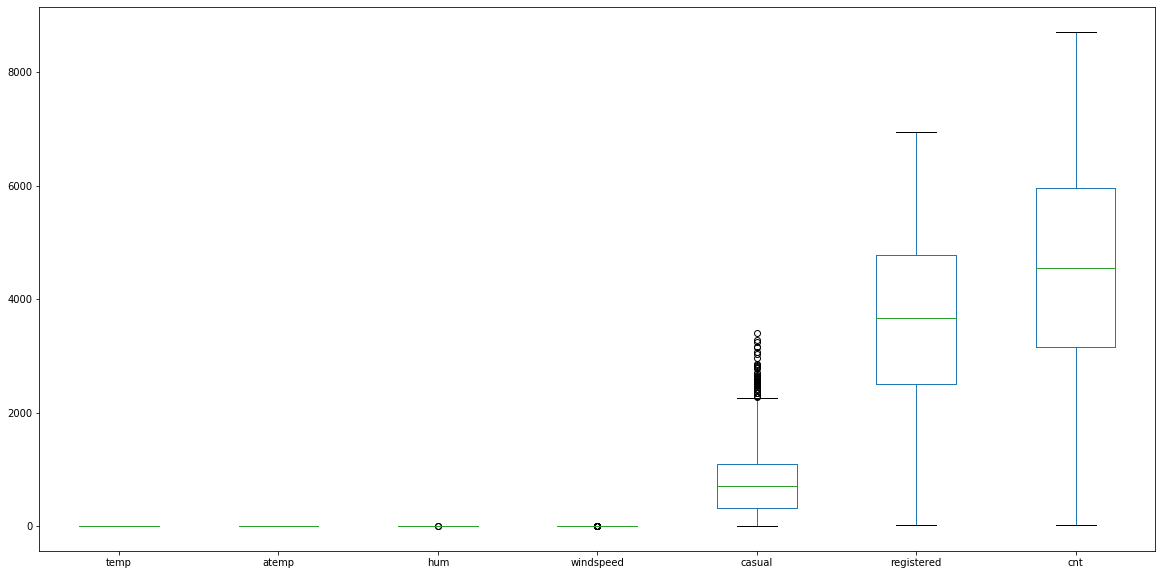

In [20]:
df_num.plot(kind="box",figsize=(20,10))

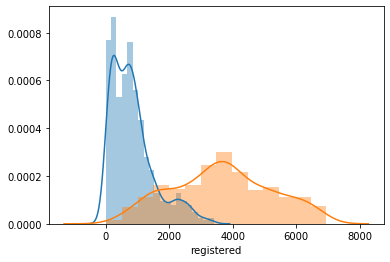

In [21]:
sns.distplot(df['casual'])
sns.distplot(df['registered'])

In [22]:
dfb.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr            datetime64[ns]
mnth          datetime64[ns]
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

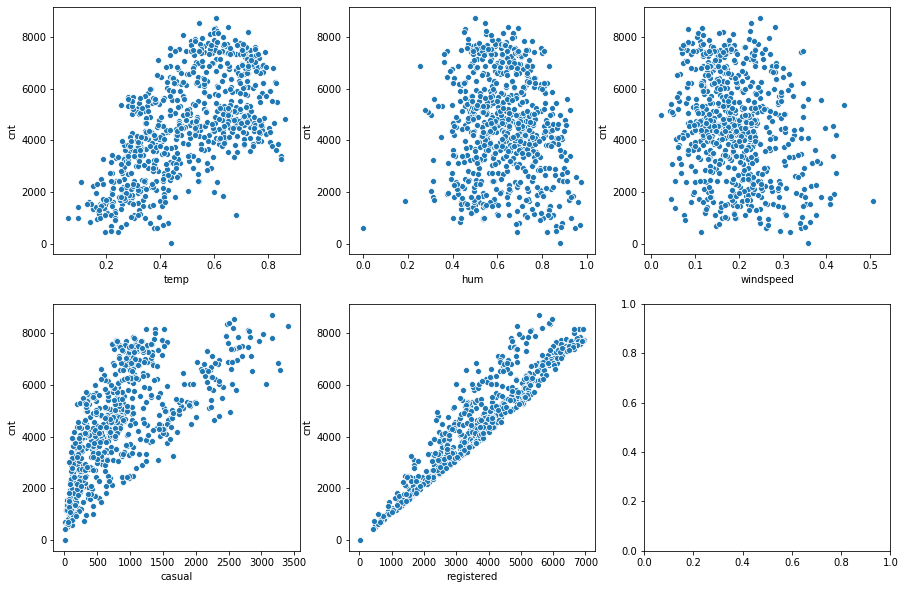

In [23]:
fig, axes = plt.subplots(2,3, figsize = (15,10))
sns.scatterplot(y = dfb['cnt'], x = dfb['temp'], data = dfb, ax=axes[0,0])
sns.scatterplot(y = dfb['cnt'], x = dfb['hum'], data = dfb,ax=axes[0,1])
sns.scatterplot(y = dfb['cnt'], x = dfb['windspeed'], data = dfb, ax=axes[0,2])
sns.scatterplot(y = dfb['cnt'], x = dfb['casual'], data = dfb,ax=axes[1,0])
sns.scatterplot(y = dfb['cnt'], x = dfb['registered'], data = dfb, ax=axes[1,1])

In [24]:
df_obj.dtypes

season        object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

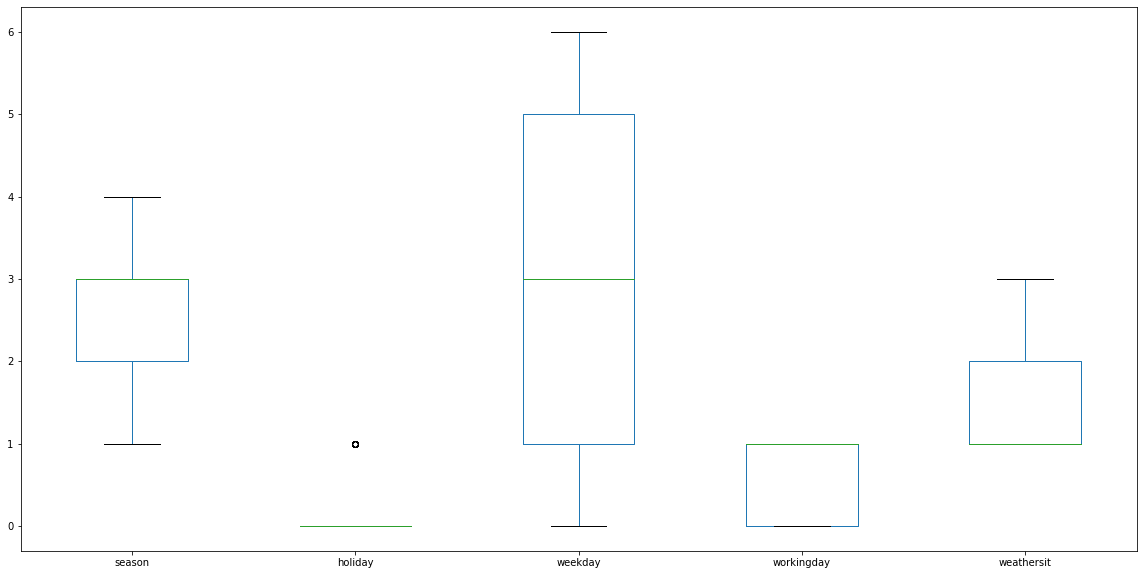

In [25]:
df_obj.plot(kind="box",figsize=(20,10))

In [38]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [39]:
x = df.drop(['cnt', 'dteday', 'instant'],axis = 1 )
y = df['cnt']

## Backward Elimination

In [86]:
cols = xc.columns.tolist()

while len(cols)>0:
    
    x_1 = xc[cols]
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if pmax>0.05:
        cols.remove(feature_max_p)
    else:
        break
        


In [87]:
model_bk = sm.OLS(y,xc[cols]).fit()
model_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.675e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:56:26   Log-Likelihood:                 17219.
No. Observations:                 731   AIC:                        -3.443e+04
Df Residuals:                     725   BIC:                        -3.440e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.404e-11   2.33e-12     -6.029      0.000   -1.86e-11   -9.47e-12
season     -1.652e-12   5.71e-13     -2.895      0.004   -2.77e-12   -5.32e-13
yr          2.869e-11   1.43e-12     20.061      0.000    2.59e-11    3.15e-11
weathersit  2.785e-12   1.06e-12      2.637      0.009    7.12e-13    4.86e-12
casual         1.0000   8.57e-16   1.17e+15      0.000       1.000       1.000
registered     1.0000   5.33e-16   1.88e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3442.640   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.492
Skew:                          -0.015   Prob(JB):                     3.03e-21
Kurtosis:                       1.239   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
x2 = df.drop(['cnt', 'instant', 'dteday'], axis = 1)
xc = sm.add_constant(x2)

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
#Variance inflation Factor (VIF) 
#r^2/1-r^2 = vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(xc.values,i) for i in range(xc.shape[1])]

pd.DataFrame({'vif': vif}, index = xc.columns)
#Vif of dummy variables is not considered.

,vif
const,59.158193
season,4.104348
yr,2.742865
mnth,3.360293
holiday,1.098107
weekday,1.051268
workingday,3.111266
weathersit,1.914898
temp,63.650194
atemp,64.806018


In [70]:
xc = xc.drop(['temp', 'atemp'], axis = 1)
model_vif = sm.OLS(y, xc).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.075e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:31:18   Log-Likelihood:                 17177.
No. Observations:                 731   AIC:                        -3.433e+04
Df Residuals:                     719   BIC:                        -3.427e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.071e-11   4.18e-12     -2.566      0.010   -1.89e-11   -2.52e-12
season     -3.016e-12   1.03e-12     -2.936      0.003   -5.03e-12   -9.99e-13
yr          2.808e-11   1.71e-12     16.461      0.000    2.47e-11    3.14e-11
mnth        5.906e-13   2.99e-13      1.975      0.049     3.4e-15    1.18e-12
holiday     3.695e-13   3.52e-12      0.105      0.916   -6.54e-12    7.28e-12
weekday     1.883e-13   2.86e-13      0.658      0.511   -3.74e-13     7.5e-13
workingday -9.379e-13   2.11e-12     -0.444      0.657   -5.09e-12    3.21e-12
weathersit  9.948e-13   1.43e-12      0.696      0.487   -1.81e-12     3.8e-12
hum         9.663e-13   5.37e-12      0.180      0.857   -9.58e-12    1.15e-11
windspeed   1.364e-12   7.97e-12      0.171      0.864   -1.43e-11     1.7e-11
casual         1.0000   1.37e-15   7.27e+14      0.000       1.000       1.000
registered     1.0000   8.13e-16   1.23e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     2979.360   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.654
Skew:                           0.001   Prob(JB):                     2.09e-25
Kurtosis:                       1.068   Cond. No.                     6.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
xc = xc.drop(['holiday'], axis = 1)
model_vif2 = sm.OLS(y, xc).fit()
model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.813e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:32:01   Log-Likelihood:                 17333.
No. Observations:                 731   AIC:                        -3.464e+04
Df Residuals:                     720   BIC:                        -3.459e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.819e-12   3.34e-12     -0.545      0.586   -8.37e-12    4.74e-12
season     -3.112e-12   8.29e-13     -3.752      0.000   -4.74e-12   -1.48e-12
yr          2.365e-11   1.38e-12     17.172      0.000    2.09e-11    2.64e-11
mnth        2.922e-13   2.41e-13      1.211      0.226   -1.82e-13    7.66e-13
weekday    -2.878e-13    2.3e-13     -1.249      0.212    -7.4e-13    1.64e-13
workingday  1.137e-13   1.68e-12      0.068      0.946   -3.18e-12    3.41e-12
weathersit -6.537e-13   1.15e-12     -0.567      0.571   -2.92e-12    1.61e-12
hum         6.821e-13   4.34e-12      0.157      0.875   -7.84e-12     9.2e-12
windspeed  -2.274e-13   6.44e-12     -0.035      0.972   -1.29e-11    1.24e-11
casual         1.0000   1.11e-15   9.04e+14      0.000       1.000       1.000
registered     1.0000   6.57e-16   1.52e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3391.178   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.044
Skew:                          -0.004   Prob(JB):                     1.39e-21
Kurtosis:                       1.224   Cond. No.                     6.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
xc = xc.drop(['windspeed'], axis = 1)
model_vif3 = sm.OLS(y, xc).fit()
model_vif3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.988e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:32:28   Log-Likelihood:                 17327.
No. Observations:                 731   AIC:                        -3.463e+04
Df Residuals:                     721   BIC:                        -3.459e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.69e-12   2.63e-12     -1.783      0.075   -9.85e-12    4.73e-13
season     -2.363e-12   8.35e-13     -2.830      0.005      -4e-12   -7.24e-13
yr          2.348e-11   1.38e-12     16.987      0.000    2.08e-11    2.62e-11
mnth        1.013e-13   2.43e-13      0.417      0.677   -3.75e-13    5.78e-13
weekday    -4.334e-13   2.32e-13     -1.870      0.062   -8.89e-13    2.17e-14
workingday -1.052e-12   1.69e-12     -0.623      0.533   -4.37e-12    2.26e-12
weathersit -9.948e-13   1.15e-12     -0.866      0.387   -3.25e-12    1.26e-12
hum         6.466e-13   4.18e-12      0.155      0.877   -7.57e-12    8.86e-12
casual         1.0000   1.11e-15   8.99e+14      0.000       1.000       1.000
registered     1.0000   6.58e-16   1.52e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3190.533   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.338
Skew:                           0.001   Prob(JB):                     3.63e-23
Kurtosis:                       1.158   Cond. No.                     4.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
xc = xc.drop(['hum'], axis = 1)
model_vif4 = sm.OLS(y, xc).fit()
model_vif4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.924e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:32:55   Log-Likelihood:                 17272.
No. Observations:                 731   AIC:                        -3.453e+04
Df Residuals:                     722   BIC:                        -3.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.418e-12   2.33e-12     -3.179      0.002    -1.2e-11   -2.84e-12
season     -2.085e-12      9e-13     -2.317      0.021   -3.85e-12   -3.18e-13
yr           2.68e-11   1.48e-12     18.135      0.000    2.39e-11    2.97e-11
mnth        2.638e-13   2.61e-13      1.012      0.312   -2.48e-13    7.75e-13
weekday    -1.084e-13   2.49e-13     -0.436      0.663   -5.96e-13     3.8e-13
workingday  3.695e-13   1.82e-12      0.203      0.839    -3.2e-12    3.94e-12
weathersit -7.958e-13      1e-12     -0.794      0.427   -2.76e-12    1.17e-12
casual         1.0000    1.2e-15   8.34e+14      0.000       1.000       1.000
registered     1.0000   7.08e-16   1.41e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3014.485   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.700
Skew:                           0.001   Prob(JB):                     5.55e-25
Kurtosis:                       1.085   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
xc = xc.drop(['workingday'], axis = 1)
model_vif4 = sm.OLS(y, xc).fit()
model_vif4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.565e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:33:22   Log-Likelihood:                 17147.
No. Observations:                 731   AIC:                        -3.428e+04
Df Residuals:                     723   BIC:                        -3.424e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.555e-11   2.66e-12     -5.840      0.000   -2.08e-11   -1.03e-11
season     -2.423e-12   1.05e-12     -2.299      0.022   -4.49e-12   -3.54e-13
yr          2.835e-11   1.59e-12     17.812      0.000    2.52e-11    3.15e-11
mnth        2.096e-13   3.09e-13      0.679      0.497   -3.96e-13    8.16e-13
weekday     3.553e-14   2.95e-13      0.121      0.904   -5.43e-13    6.14e-13
weathersit -8.811e-13   1.17e-12     -0.753      0.452   -3.18e-12    1.42e-12
casual         1.0000   9.51e-16   1.05e+15      0.000       1.000       1.000
registered     1.0000   5.95e-16   1.68e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     2986.020   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.276
Skew:                           0.002   Prob(JB):                     2.53e-25
Kurtosis:                       1.072   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
xc = xc.drop(['weekday'], axis = 1)
model_vif = sm.OLS(y, xc).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.727e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:33:45   Log-Likelihood:                 17293.
No. Observations:                 731   AIC:                        -3.457e+04
Df Residuals:                     724   BIC:                        -3.454e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.64e-12   2.11e-12     -4.098      0.000   -1.28e-11    -4.5e-12
season      -1.37e-12    8.6e-13     -1.592      0.112   -3.06e-12    3.19e-13
yr          2.451e-11    1.3e-12     18.887      0.000     2.2e-11    2.71e-11
mnth        2.132e-14   2.52e-13      0.084      0.933   -4.74e-13    5.17e-13
weathersit  9.095e-13   9.55e-13      0.952      0.341   -9.65e-13    2.78e-12
casual         1.0000   7.76e-16   1.29e+15      0.000       1.000       1.000
registered     1.0000   4.84e-16   2.07e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     2958.576   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.862
Skew:                          -0.001   Prob(JB):                     1.14e-25
Kurtosis:                       1.058   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
xc = xc.drop(['mnth'], axis = 1)
model_vif = sm.OLS(y, xc).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.675e+30
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:34:02   Log-Likelihood:                 17219.
No. Observations:                 731   AIC:                        -3.443e+04
Df Residuals:                     725   BIC:                        -3.440e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.404e-11   2.33e-12     -6.029      0.000   -1.86e-11   -9.47e-12
season     -1.652e-12   5.71e-13     -2.895      0.004   -2.77e-12   -5.32e-13
yr          2.869e-11   1.43e-12     20.061      0.000    2.59e-11    3.15e-11
weathersit  2.785e-12   1.06e-12      2.637      0.009    7.12e-13    4.86e-12
casual         1.0000   8.57e-16   1.17e+15      0.000       1.000       1.000
registered     1.0000   5.33e-16   1.88e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3442.640   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.492
Skew:                          -0.015   Prob(JB):                     3.03e-21
Kurtosis:                       1.239   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumptions

### 1. Normality of residuals

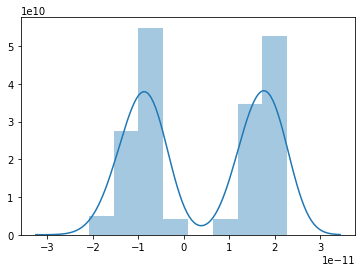

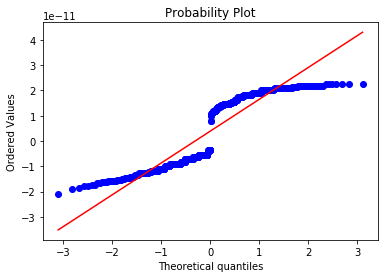

In [79]:
import scipy.stats as stats
residuals = model_vif.resid
sns.distplot(residuals)
plt.show()
stats.probplot(residuals, plot = plt)
plt.show()

In [80]:
#Jarque Bera Test of Normality
#H0: Data is normal
#H1: Data is not normal
print(stats.jarque_bera(residuals))

(94.4921786031437, 0.0)


Accept H1: Data is not normal

### Homoscadasticity

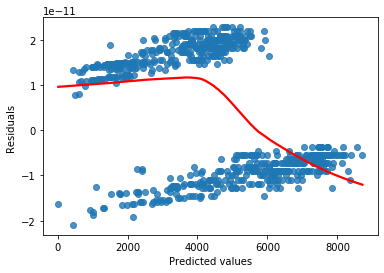

(2.1591374658708613, 2.672941120087203e-13, 'increasing')

In [81]:
residuals = model_vif.resid
y_pred = model_vif.predict(xc)

sns.regplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color':'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals ')
plt.show()

#H0: Residual variance is constant across the range of data. 
#H1: Residual variance is not constant across the range of data. 

import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(y = residuals, x = xc)
test

### Auto-correlation

The Durbin Watson score is 0.034 which is less than 2, hence we conclude that there is no auto-correlation

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


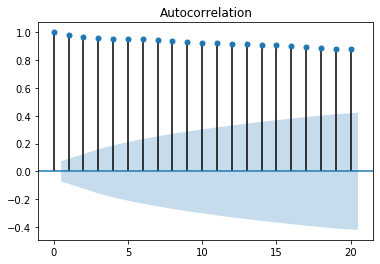

In [82]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags = 20)
acf.show()

### Linearity of relationships

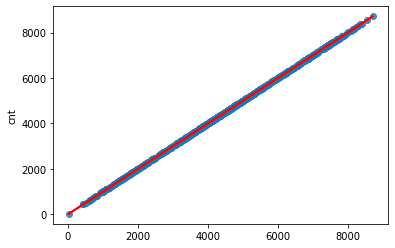

In [83]:
sns.regplot(x = y_pred, y = y, lowess = True, line_kws={'color':'red'})
plt.show()

The linear plot shows that the model_vif is exact representative count. This is a highly overfit model.

# Machine Learning 

## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
LR = LinearRegression()

x2 = df.drop(['cnt', 'dteday', 'instant'], axis = 1)
y2 = df['cnt']

LR = LR.fit(x2, y2)

print(LR.intercept_)

print(LR.coef_)

y_pred = LR.predict(x2)
print(y_pred)

-3.637978807091713e-12
[-7.13638900e-13  4.65849581e-13  1.25271321e-13 -4.02351687e-13
  4.22737068e-14 -1.07270809e-12 -2.68223618e-13 -9.32607033e-13
  4.06541296e-13  2.44099581e-13 -7.72645552e-13  1.00000000e+00
  1.00000000e+00]
[ 985.  801. 1349. 1562. 1600. 1606. 1510.  959.  822. 1321. 1263. 1162.
 1406. 1421. 1248. 1204. 1000.  683. 1650. 1927. 1543.  981.  986. 1416.
 1985.  506.  431. 1167. 1098. 1096. 1501. 1360. 1526. 1550. 1708. 1005.
 1623. 1712. 1530. 1605. 1538. 1746. 1472. 1589. 1913. 1815. 2115. 2475.
 2927. 1635. 1812. 1107. 1450. 1917. 1807. 1461. 1969. 2402. 1446. 1851.
 2134. 1685. 1944. 2077.  605. 1872. 2133. 1891.  623. 1977. 2132. 2417.
 2046. 2056. 2192. 2744. 3239. 3117. 2471. 2077. 2703. 2121. 1865. 2210.
 2496. 1693. 2028. 2425. 1536. 1685. 2227. 2252. 3249. 3115. 1795. 2808.
 3141. 1471. 2455. 2895. 3348. 2034. 2162. 3267. 3126.  795. 3744. 3429.
 3204. 3944. 4189. 1683. 4036. 4191. 4073. 4400. 3872. 4058. 4595. 5312.
 3351. 4401. 4451. 2633. 4433. 460